In [1]:
import pprint

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
from matplotlib.ticker import MultipleLocator

In [2]:
def create_fig() -> tuple[plt.Figure, plt.Axes]:
    fig: plt.Figure = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(1, 1, 1)
    return fig, ax


def make_circle(ax: plt.Axes, center: tuple[float, float], radius: float,
                rectangle_pos: list[tuple[float, float]]) -> None:
    ax.set_aspect('equal')
    t = 1.1
    ax.set_xlim(center[0] - radius * t, center[0] + radius * t)
    ax.set_ylim(center[1] - radius * t, center[1] + radius * t)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    c = patches.Circle(xy=center, radius=radius, fill=False)
    r = [patches.Rectangle(xy=t, width=1, height=1, ec="#981200", fc="pink", alpha=0.5) for t in rectangle_pos]
    ax.add_patch(c)
    for t in r:
        ax.add_patch(t)
    for t in rectangle_pos:
        distance = np.sqrt((t[0] - center[0] + 0.5) ** 2 + (t[1] - center[1] + 0.5) ** 2)
        ax.text(t[0] + 0.1, t[1] + 0.1, f"{distance:.2f}", )
    ax.grid(True)
    ax.set_title(f"{center=}, {radius=}, {len(rectangle_pos)=}")
    return


def adjacent(r, theta) -> set[(int, int)]:
    x = int(r * np.cos(theta))
    y = int(r * np.sin(theta))
    return {(x, y), (x + 1, y), (x, y + 1), (x - 1, y), (x, y - 1), (x + 1, y + 1), (x - 1, y + 1), (x - 1, y - 1),
            (x + 1, y - 1)}


def circle_filter(pos: tuple[float, float], center: tuple[float, float], radius: float) -> bool:
    x1, x2 = pos[0] - int(center[0]), pos[0] - int(center[1]) + 1
    y1, y2 = pos[1] - int(center[1]), pos[1] - int(center[1]) + 1
    r1 = r ** 2
    return (
            (x1 ** 2 + y1 ** 2 > r1 > x2 ** 2 + y2 ** 2) or
            (x1 ** 2 + y2 ** 2 > r1 > x2 ** 2 + y1 ** 2) or
            (x2 ** 2 + y2 ** 2 > r1 > x1 ** 2 + y1 ** 2) or
            (x2 ** 2 + y1 ** 2 > r1 > x1 ** 2 + y1 ** 2)
    )


In [6]:
def get_poses(center, radius):
    pre = {t for theta in np.arange(0, 2 * np.pi, np.arctan(1 / radius)) for t in adjacent(radius, theta)
           if (radius - 1) ** 2 < (t[0] + 0.5) ** 2 + (t[1] + 0.5) ** 2 <= radius ** 2}
    distances = {(t[0] + 0.5) ** 2 + (t[1] + 0.5) ** 2 for t in pre}
    print([np.sqrt(t) for t in distances])
    if len(distances) > 2:
        max_distance = max(distances)
        poses = [t for t in pre if (t[0] + 0.5) ** 2 + (t[1] + 0.5) ** 2 != max_distance]
        return poses
    else:
        return pre

9.924716620639604


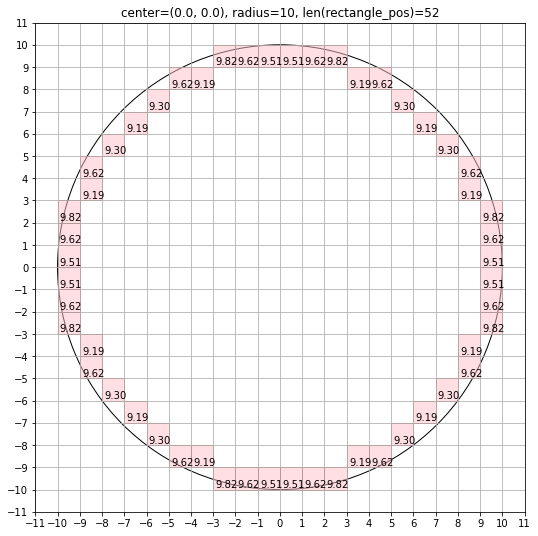

In [4]:
# trial1
fig, ax = create_fig()

r = 10
c = (0., 0.)
poses = sorted({t for theta in np.arange(0, 2 * np.pi, np.arctan(1 / r)) for t in adjacent(r, theta)
                if (r - 1) ** 2 < (t[0] + 0.5) ** 2 + (t[1] + 0.5) ** 2 <= r ** 2})
max_distance = max(np.sqrt((t[0] + 0.5) ** 2 + (t[1] + 0.5) ** 2) for t in poses)
print(max_distance)
poses = [t for t in poses if np.sqrt((t[0] + 0.5) ** 2 + (t[1] + 0.5) ** 2) != max_distance]
make_circle(ax, c, r, poses)
fig.show()

[5.70087712549569, 6.363961030678928, 6.041522986797286, 5.522680508593631]


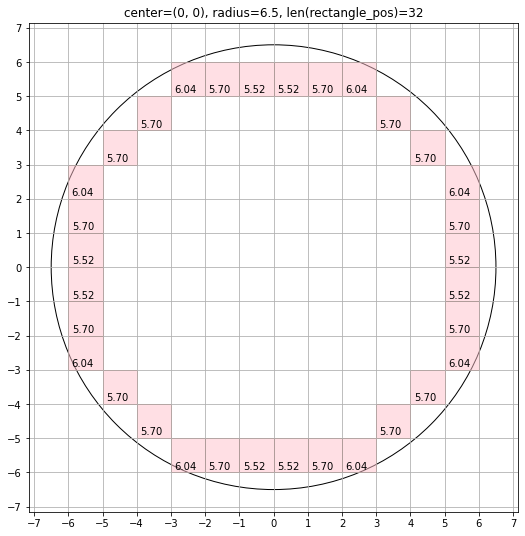

In [25]:
# T2

fig, ax = create_fig()

r = 6.5
c = (0, 0)
poses = set(get_poses(c, r))
make_circle(ax, c, r, poses)
fig.show()

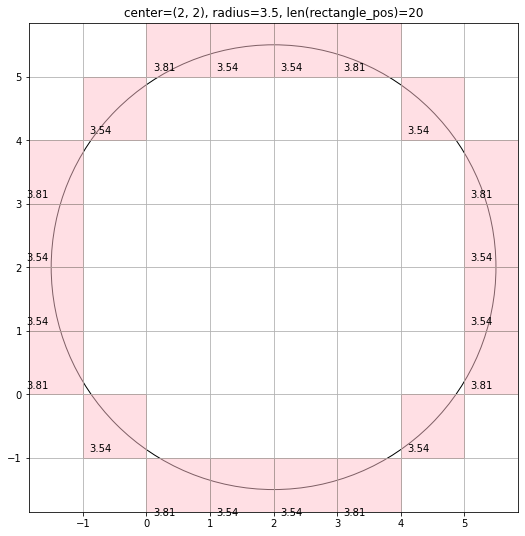

In [15]:
# T3

fig, ax = create_fig()

r = 3.5
c = (2, 2)
poses = [(x + c[0], y + c[1]) for (x, y) in [t for (x, y) in [(3, 0), (3, 1), (2, 2), (1, 3), (0, 3)] for t in
                                             [(x, y), (-x - 1, y), (x, -y - 1), (-x - 1, -y - 1)]]]
make_circle(ax, c, r, poses)

fig.show()

In [32]:
def make_circle2(ax: plt.Axes, center: tuple[float, float], radius: float,
                 rectangle_pos: list[tuple[float, float]]) -> None:
    ax.set_aspect('equal')
    t = 1.1
    ax.set_xlim(center[0] - radius * t, center[0] + radius * t)
    ax.set_ylim(center[1] - radius * t, center[1] + radius * t)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    c = patches.Circle(xy=center, radius=radius, fill=False)
    r = [patches.Rectangle(xy=t, width=1, height=1, ec="#981200", fc="pink", alpha=0.5) for t in rectangle_pos]
    ax.add_patch(c)
    for t in r:
        ax.add_patch(t)
    for t in rectangle_pos:
        distance = np.sqrt((t[0] - center[0]) ** 2 + (t[1] - center[1]) ** 2)
        ax.text(t[0] + 0.1, t[1] + 0.1, f"{distance:.2f}", )
    ax.grid(True)
    ax.set_title(f"{center=}, {radius=}, {len(rectangle_pos)=}")
    return


def get_poses2(center, radius):
    pre = {t for theta in np.arange(0, 2 * np.pi, np.arctan(1 / radius)) for t in adjacent(radius, theta)
           if (radius - 1) ** 2 < (t[0]) ** 2 + (t[1]) ** 2 <= radius ** 2}
    distances = {(t[0]) ** 2 + (t[1]) ** 2 for t in pre}
    print([np.sqrt(t) for t in distances])
    if len(distances) > 2:
        max_distance = max(distances)
        poses = [t for t in pre if (t[0]) ** 2 + (t[1]) ** 2 != max_distance]
        return poses
    else:
        return pre

[3.605551275463989, 4.0, 4.123105625617661, 4.242640687119285, 4.47213595499958]
[(-4, -1),
 (-3, -2),
 (-3, -3),
 (-2, -3),
 (-1, -4),
 (0, -4),
 (1, -4),
 (2, -3),
 (3, -3),
 (3, -2),
 (4, -1),
 (4, 0),
 (4, 1),
 (3, 2),
 (3, 3),
 (2, 3),
 (1, 4),
 (0, 4),
 (-1, 4),
 (-2, 3),
 (-3, 3),
 (-3, 2),
 (-4, 1),
 (-4, 0)]


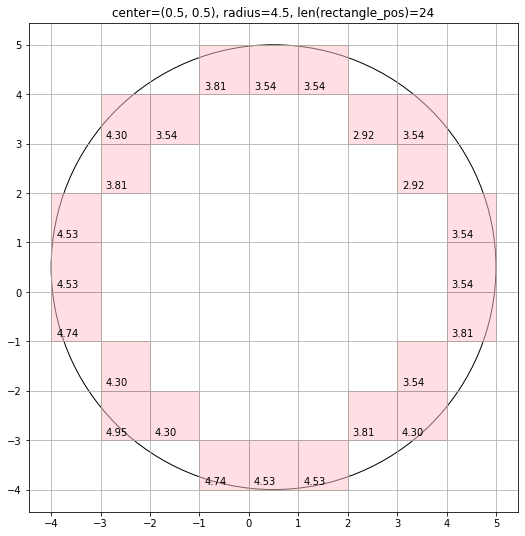

In [46]:
fig, ax = create_fig()

c = (.5, .5)
r = 4.5
poses = get_poses2(c, r)
make_circle2(ax, c, r, poses)

fig.show()

pprint.pprint(sorted(poses, key=lambda t: np.arctan2(t[1], t[0])))

In [38]:
pprint.pprint(adjacent(3, np.pi / 2), width=9)

{(-1, 2),
 (-1, 3),
 (-1, 4),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4)}
